#**Building a Simple Autoencoder**



This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##**Problem Statement**

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike

In this demo, your goal is to reconstruct digits images from a dataset of thousands of handwritten images using an **Autoencoder** 

##**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Import Required Libraries
- Build the Encoder Model
- Build the Decoder Model
- Pre-process the dataset
- Train the Autoencoder
- Data Visualization


##**Dataset Description**




The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



##**Skills Gained**

- TensorFlow 2.x
- Autoencoders


##**Importing Required Libraries**

In [29]:
#Importing Required Libraries

import tensorflow as tf #Importing Tensorflow Library
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

print('Tensorflow Version:',tf.__version__)

Tensorflow Version: 2.2.0


In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

##**Build the Encoder Model**



In [0]:
encoder = Model(input_img, encoded)

##**Build the Decoder Model**

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [33]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 0.001))
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


##**Pre-process the dataset**

##**Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images)**

In [0]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

##**Normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784**



In [35]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


##**Train the autoencoder for 50 epochs**

In [36]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2740 - val_loss: 0.1868
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1691 - val_loss: 0.1525
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1438 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1284 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1179 - val_loss: 0.1124
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1106 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1055 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1020 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0994 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0974 - val_loss: 0.0955

##**Data Visualization**

##**Now, we can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib**

In [0]:
# encode and decode some digits
# note that we take them from the test set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

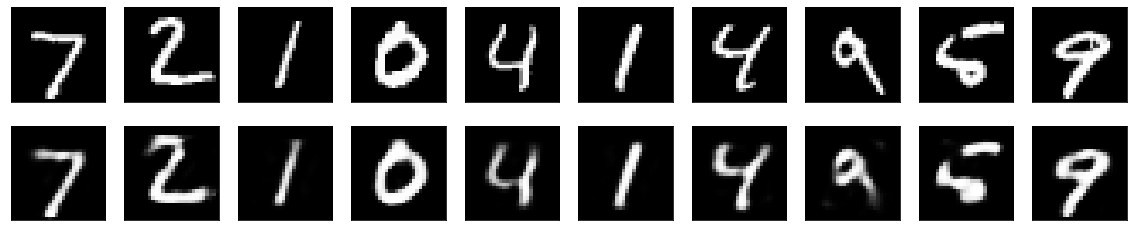

In [38]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()